# Imports

The Natural Language Toolkit (NLTK) is a Python library for handling natural language processing (NLP) tasks, ranging from segmenting words or sentences to performing advanced tasks, such as parsing grammar and classifying text. 

In [0]:
#Loading NLTK
import nltk

# Tokenization
Word tokens are the basic units of text involved in any NLP task. The first step, when processing text, is to split it into tokens. NLTK provides different types of tokenizers for doing this. We will look at how to tokenize Twitter comments from the Twitter samples corpora, available in NLTK.

# Sentence Tokenization

Breaks text paragraphs into sentences

In [0]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
Text = "How did he know those men are guilty ? Now , what difference does it make , as long as they 're the men that did it ? But it does make a difference , does n't it , Mr . Kyle ? What were those men guilty of , murder or just acting on your instructions ? Oh , that 's ridiculous . What reason would he have to do a thing like this ? Well , maybe I can give you a clue . Which one did you want killed , Kyle , the man or the woman ?"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
tokenized_sentence = sent_tokenize(Text)
print(tokenized_sentence)

['How did he know those men are guilty ?', "Now , what difference does it make , as long as they 're the men that did it ?", "But it does make a difference , does n't it , Mr .", 'Kyle ?', 'What were those men guilty of , murder or just acting on your instructions ?', "Oh , that 's ridiculous .", 'What reason would he have to do a thing like this ?', 'Well , maybe I can give you a clue .', 'Which one did you want killed , Kyle , the man or the woman ?']


# Word Tokenization

Word tokenizer breaks text paragraph into words.

In [0]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(Text)
print(tokenized_word)

['How', 'did', 'he', 'know', 'those', 'men', 'are', 'guilty', '?', 'Now', ',', 'what', 'difference', 'does', 'it', 'make', ',', 'as', 'long', 'as', 'they', "'re", 'the', 'men', 'that', 'did', 'it', '?', 'But', 'it', 'does', 'make', 'a', 'difference', ',', 'does', "n't", 'it', ',', 'Mr', '.', 'Kyle', '?', 'What', 'were', 'those', 'men', 'guilty', 'of', ',', 'murder', 'or', 'just', 'acting', 'on', 'your', 'instructions', '?', 'Oh', ',', 'that', "'s", 'ridiculous', '.', 'What', 'reason', 'would', 'he', 'have', 'to', 'do', 'a', 'thing', 'like', 'this', '?', 'Well', ',', 'maybe', 'I', 'can', 'give', 'you', 'a', 'clue', '.', 'Which', 'one', 'did', 'you', 'want', 'killed', ',', 'Kyle', ',', 'the', 'man', 'or', 'the', 'woman', '?']


Let's try this with NLTK's inbuilt data.



In [0]:
# Use the NLTK Downloader to obtain the Twitter Corpus
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples as ts

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [0]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [0]:
# Obtain a subset of negative_tweets.json
negative_tweets = ts.strings('negative_tweets.json')
sample_tweets = negative_tweets[1]
print(sample_tweets)

Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


In [0]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wtoken
wtoken(sample_tweets)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Everything',
 'in',
 'the',
 'kids',
 'section',
 'of',
 'IKEA',
 'is',
 'so',
 'cute',
 '.',
 'Shame',
 'I',
 "'m",
 'nearly',
 '19',
 'in',
 '2',
 'months',
 ':',
 '(']

**To split text based on punctuation and white spaces, NLTK provides the wordpunct_tokenize tokenizer.**

**This will also tokenize the punctuation characters. This step is illustrated in the following code.**

In [0]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(sample_tweets)

['Everything',
 'in',
 'the',
 'kids',
 'section',
 'of',
 'IKEA',
 'is',
 'so',
 'cute',
 '.',
 'Shame',
 'I',
 "'",
 'm',
 'nearly',
 '19',
 'in',
 '2',
 'months',
 ':(']

As you can see above, some of the words between hyphens are also tokenized as well as other punctuations mark, compared to the word_tokenize.

We can build custom tokenizers using NLTK's regular expression tokenizer.

Let us use a simple regular expression (regexp) to detect a word containing only alphanumeric characters

In [0]:
from nltk import regexp_tokenize
patn = '\w+'
regexp_tokenize(sample_tweets, patn)

['Everything',
 'in',
 'the',
 'kids',
 'section',
 'of',
 'IKEA',
 'is',
 'so',
 'cute',
 'Shame',
 'I',
 'm',
 'nearly',
 '19',
 'in',
 '2',
 'months']

As another example, we will use a regular expression that detects words along with a few punctuation characters .

In [0]:
patn = '\w+|[!,\-,]'
regexp_tokenize(sample_tweets, patn)

['Everything',
 'in',
 'the',
 'kids',
 'section',
 'of',
 'IKEA',
 'is',
 'so',
 'cute',
 'Shame',
 'I',
 'm',
 'nearly',
 '19',
 'in',
 '2',
 'months']

# Frequency Distribution

In [0]:
from nltk.probability import FreqDist
freq_distribution = FreqDist(tokenized_word)
print(freq_distribution)

<FreqDist with 62 samples and 101 outcomes>


Find the most common words in our text.

In [0]:
freq_distribution.most_common(3)

[(',', 9), ('?', 6), ('it', 4)]

Plot the frequency distribution of the words in the text.

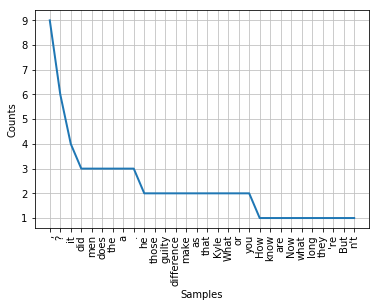

In [0]:
import matplotlib.pyplot as plt
freq_distribution.plot(30, cumulative=False)
plt.show()

# Stopwords Removal

Commonly used words in English such as the, is, he, and so on, are generally called stop words. Other languages have similar commonly used words that fall under the same category. Stopwords are considered as noise in the text as they do not signify any importance to the document.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.


In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'my', 'the', 'most', 'out', 'o', 'doesn', 's', 'or', 'each', 'his', 'few', 'ourselves', 'not', 've', "you'll", "that'll", 'should', 'very', "haven't", 'this', "shan't", 'didn', 'isn', "needn't", 'them', 'other', 'hasn', 'who', 'only', 'we', 'but', 'up', 'weren', 'so', "shouldn't", 'was', 'were', 'be', 'having', 'further', 'y', "hadn't", 'into', 'such', 'about', 'mustn', 't', "weren't", 'did', 'no', 'she', 'between', 'an', 'don', "isn't", 'd', "you've", 'of', 'yourself', 'same', "couldn't", 'hadn', 'over', "aren't", 'its', 'down', 'some', 'he', 'with', "she's", 'itself', "don't", 're', "didn't", 'from', "mightn't", 'these', 'is', 'under', 'i', 'our', 'after', 'a', "you're", 'to', 'll', 'and', 'ma', 'it', 'herself', 'ours', 'm', 'theirs', 'do', 'how', 'where', 'again', 'too', 'then', 'here', 'through', 'their', 'just', 'her', 'am', 'haven', 'before', 'own', 'been', 'shan', 'which', 'above', 'needn', 'myself', 'nor', 'you', 'does', 'are', 'during', 'me', 'when', 'shouldn', 'can', 'aren',

Removing Stopwords

In [0]:
# Create an empty list to keep filtered sentence
tokenized_sentence
filtered_sentence = []
for w in tokenized_sentence:
  if w not in stop_words:
    filtered_sentence.append(w)
    
print("Tokenized Sentence:", tokenized_sentence)
print("Filtered Sentence:", filtered_sentence)


Tokenized Sentence: ['How did he know those men are guilty ?', "Now , what difference does it make , as long as they 're the men that did it ?", "But it does make a difference , does n't it , Mr .", 'Kyle ?', 'What were those men guilty of , murder or just acting on your instructions ?', "Oh , that 's ridiculous .", 'What reason would he have to do a thing like this ?', 'Well , maybe I can give you a clue .', 'Which one did you want killed , Kyle , the man or the woman ?']
Filtered Sentence: ['How did he know those men are guilty ?', "Now , what difference does it make , as long as they 're the men that did it ?", "But it does make a difference , does n't it , Mr .", 'Kyle ?', 'What were those men guilty of , murder or just acting on your instructions ?', "Oh , that 's ridiculous .", 'What reason would he have to do a thing like this ?', 'Well , maybe I can give you a clue .', 'Which one did you want killed , Kyle , the man or the woman ?']


In [0]:
Text_without_stopwords = [word for word in Text.split() if word not in stop_words]
print("Text with stopwords:", Text.split() )
print("Text without stopwords:",Text_without_stopwords)

Text with stopwords: ['How', 'did', 'he', 'know', 'those', 'men', 'are', 'guilty', '?', 'Now', ',', 'what', 'difference', 'does', 'it', 'make', ',', 'as', 'long', 'as', 'they', "'re", 'the', 'men', 'that', 'did', 'it', '?', 'But', 'it', 'does', 'make', 'a', 'difference', ',', 'does', "n't", 'it', ',', 'Mr', '.', 'Kyle', '?', 'What', 'were', 'those', 'men', 'guilty', 'of', ',', 'murder', 'or', 'just', 'acting', 'on', 'your', 'instructions', '?', 'Oh', ',', 'that', "'s", 'ridiculous', '.', 'What', 'reason', 'would', 'he', 'have', 'to', 'do', 'a', 'thing', 'like', 'this', '?', 'Well', ',', 'maybe', 'I', 'can', 'give', 'you', 'a', 'clue', '.', 'Which', 'one', 'did', 'you', 'want', 'killed', ',', 'Kyle', ',', 'the', 'man', 'or', 'the', 'woman', '?']
Text without stopwords: ['How', 'know', 'men', 'guilty', '?', 'Now', ',', 'difference', 'make', ',', 'long', "'re", 'men', '?', 'But', 'make', 'difference', ',', "n't", ',', 'Mr', '.', 'Kyle', '?', 'What', 'men', 'guilty', ',', 'murder', 'acting

# Stemming
Stemming is a text preprocessing task for transforming related or similar variants of a word (such as walking) to its base form (to walk), as they share the same meaning.

One of the basic transformation stemming actions is to reduce a plural word to its singular form: apples is reduced to apple,

In [0]:
from nltk.stem import PorterStemmer
stem = PorterStemmer()

In [0]:
stem.stem("reached")

'reach'

In [0]:
stem.stem('reaching')

'reach'

In [0]:
stem.stem('reached')

'reach'

In [0]:
stemmed_words = []
for w in filtered_sentence:
  stemmed_words.append(stem.stem(w))

print("Filtered Sentence:", filtered_sentence)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['How did he know those men are guilty ?', "Now , what difference does it make , as long as they 're the men that did it ?", "But it does make a difference , does n't it , Mr .", 'Kyle ?', 'What were those men guilty of , murder or just acting on your instructions ?', "Oh , that 's ridiculous .", 'What reason would he have to do a thing like this ?', 'Well , maybe I can give you a clue .', 'Which one did you want killed , Kyle , the man or the woman ?']
Stemmed Sentence: ['how did he know those men are guilty ?', "now , what difference does it make , as long as they 're the men that did it ?", "but it does make a difference , does n't it , mr .", 'kyle ?', 'what were those men guilty of , murder or just acting on your instructions ?', "oh , that 's ridiculous .", 'what reason would he have to do a thing like this ?', 'well , maybe i can give you a clue .', 'which one did you want killed , kyle , the man or the woman ?']


# Lemmatization

In [0]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lema = WordNetLemmatizer

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
word = "studies"
print("Lemmatized Word:", lema.lemmatize("v", word))
print("Stemmed Word:", stem.stem(word))

Lemmatized Word: study
Stemmed Word: studi


# Spell Check

# Some Common String Functions


1. Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".

In [0]:
input_text = "Hello"

In [0]:
lowered_input_text = input_text.lower()
lowered_input_text

'hello'

2. Capitalizing

In [0]:
capitalized_text = lowered_input_text.upper()
capitalized_text

'HELLO'

3. Camel Case: only the first letter of the word is capitalized

In [0]:
camel_cased_text = lowered_input_text.capitalize()
camel_cased_text

'Hello'

We can use this with a sentence as well. However, only the first letter of the sentence is capitalized.

In [0]:
"hello, my young child, john".capitalize()

'Hello, my young child, john'

Some other useful string methods can be found here - https://docs.python.org/3.7/library/stdtypes.html#string-methods

# POS Tagging

A part-of-speech tagger, processes a sequence of words and attaches a part of speech tag to each word.

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
Text = "The little pine tree said I do not like needles. All the other trees in the woods have pretty leaves."
Word_tokens = word_tokenize(Text)
nltk.pos_tag(Text)

[('T', 'NNP'),
 ('h', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('l', 'NN'),
 ('i', 'NN'),
 ('t', 'VBP'),
 ('t', 'NN'),
 ('l', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('p', 'NN'),
 ('i', 'NN'),
 ('n', 'VBP'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('r', 'NN'),
 ('e', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('s', 'VBZ'),
 ('a', 'DT'),
 ('i', 'JJ'),
 ('d', 'NN'),
 (' ', 'NN'),
 ('I', 'PRP'),
 (' ', 'VBP'),
 ('d', 'JJ'),
 ('o', 'NN'),
 (' ', 'NNP'),
 ('n', 'CC'),
 ('o', 'JJ'),
 ('t', 'NN'),
 (' ', 'NNP'),
 ('l', 'NN'),
 ('i', 'NN'),
 ('k', 'VBP'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('n', 'CC'),
 ('e', 'JJ'),
 ('e', 'NN'),
 ('d', 'NN'),
 ('l', 'NN'),
 ('e', 'NN'),
 ('s', 'NN'),
 ('.', '.'),
 (' ', 'VB'),
 ('A', 'DT'),
 ('l', 'NN'),
 ('l', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('h', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('o', 'VBZ'),
 ('t', 'JJ'),
 ('h', 'NN'),
 ('e', 'NN'),
 ('r', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('r', 'NN'),
 ('e', 'NN'),
 ('e', 'NN'),
 ('s', 'VBD'),
 (' ', 'NNP'),
 ('i', 'NN'),
 